In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interp

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, recall_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.patches as patches

from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import std


In [2]:
one_hot = True
binary = True

In [3]:
if one_hot:
    df = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\New Strat\\one_hot_data.csv')
    if binary:
        X = df.drop(columns={"sum_raw_categorical","sum_raw_scores","Selected","sum_raw_binary"}, axis=1)
        y = df['sum_raw_binary']
    else:
        X = df.drop(columns={"sum_raw_categorical","sum_raw_scores","Selected","sum_raw_binary"}, axis=1)
        y = df['sum_raw_categorical']
    df['sum_raw_numeric'] = y.astype('category')
    df['sum_raw_numeric'] = df['sum_raw_numeric'].cat.codes
    y_numeric = df['sum_raw_numeric']
    x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2) #2 best perf from matrix 3 best perf for r2 score
    x_train_numeric, x_test_numeric, y_train_numeric, y_test_numeric= train_test_split(X,y_numeric, test_size=0.2, random_state=0)
    print(len(df))

else:
    df_train = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\New Strat\\reduced_train_data.csv')
    df_test = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\New Strat\\reduced_test_data.csv')
    df_train['sum_raw_numeric'] = df_train['sum_raw_categorical'].astype('category')
    df_train['sum_raw_numeric'] = df_train['sum_raw_numeric'].cat.codes
    df_test['sum_raw_numeric'] = df_test['sum_raw_categorical'].astype('category')
    df_test['sum_raw_numeric'] = df_test['sum_raw_numeric'].cat.codes
    x_train = df_train.drop(columns={"sum_raw_categorical","Selected","sum_raw_numeric"}, axis=1)
    y_train = df_train['sum_raw_categorical']
    y_train_numeric = df_train['sum_raw_numeric']
    x_test = df_test.drop(columns={"sum_raw_categorical","Selected","sum_raw_numeric"}, axis=1)
    y_test = df_test['sum_raw_categorical']
    y_test_numeric = df_test['sum_raw_numeric']
    y_test_numeric

    X = pd.concat([x_train,x_test],axis=0)
    y = pd.concat([y_train,y_test],axis=0)
    y_numeric = pd.concat([y_train_numeric,y_test_numeric],axis=0)
    x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
    x_train_numeric, x_test_numeric, y_train_numeric, y_test_numeric= train_test_split(X,y_numeric, test_size=0.2, random_state=1)
    print(len(df_test.loc[df_test['sum_raw_categorical']=='BELOW AVERAGE']))
    print(len(X) + len(y))

y


306


0      BELOW AVERAGE
1      ABOVE AVERAGE
2      ABOVE AVERAGE
3      BELOW AVERAGE
4      BELOW AVERAGE
           ...      
301    ABOVE AVERAGE
302    BELOW AVERAGE
303    ABOVE AVERAGE
304    ABOVE AVERAGE
305    ABOVE AVERAGE
Name: sum_raw_binary, Length: 306, dtype: object

In [4]:
k = 10
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=k, random_state=1, shuffle=True)

In [1]:
#Logistic Regression

linearModel = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
linearModel.fit(x_train_numeric, y_train_numeric)
linearPredictions = linearModel.predict(x_test_numeric)
residuals = y_test_numeric - linearPredictions

Model_score = linearModel.score(x_test_numeric,y_test_numeric)
R2_score = r2_score(y_test_numeric,linearPredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test_numeric,linearPredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test_numeric,linearPredictions))
recall = recall_score(y_test_numeric, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)
print('Recall: ', recall)


# create model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
#create evaluation methods
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='macro'), 
           'roc_auc' : make_scorer(roc_auc_score,average='macro',multi_class='ovr',needs_proba=True)}
# evaluate model
# scores = cross_validate(model, X, y_numeric, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(model, x_train_numeric, y_train_numeric, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test_numeric, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
if binary:
    classnames = ['ABOVE AVERAGE', 'BELOW AVERAGE']
else:
    classnames = ['ABOVE AVERAGE', 'AVERAGE', 'BELOW AVERAGE']
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

if binary:
    n_class = 2
else:
    n_class = 3


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Logistic ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()
linearPredictions

NameError: name 'LogisticRegression' is not defined

Model Score:  0.8387096774193549
Recall:  0.7518689196108551
KFold Accuracy: 0.841 (0.056)
KFold Precision: 0.735 (0.129)
KFold Recall: 0.715 (0.089)
KFold F1 Score: 0.714 (0.100)
KFold ROC/AUC: 0.893 (0.056)


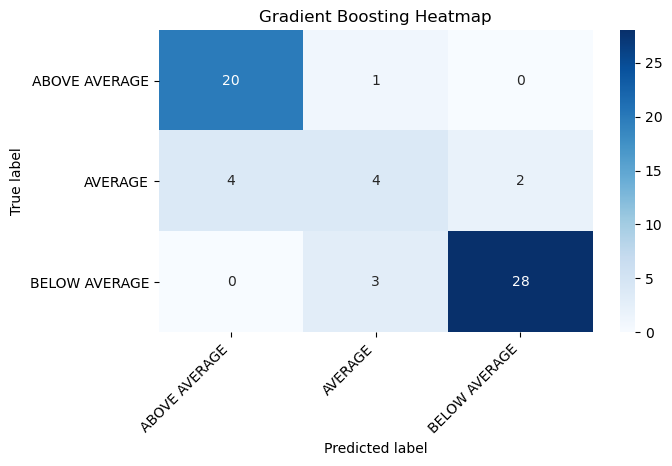

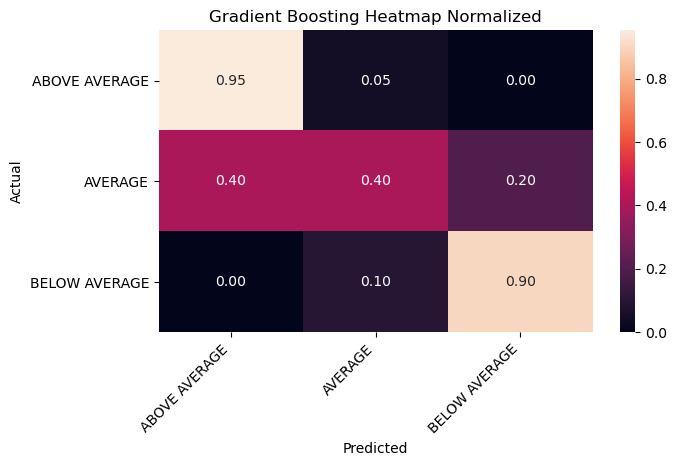

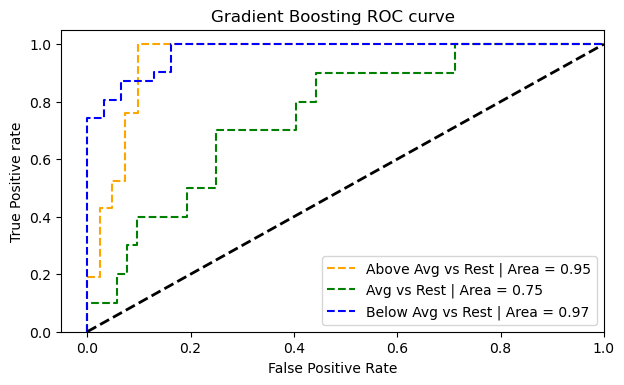

In [ ]:
#Gradient Boosting

linearModel = GradientBoostingClassifier()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)
#residuals = y_test - linearPredictions


Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)
# R2_score = r2_score(y_test,linearPredictions) #Same as Model_Score
# Mean_sqrd_err = mean_squared_error(y_test,linearPredictions)
# Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,linearPredictions))
# print('R2 Score: ', R2_score)
# print('Mean Squared Error: ', Mean_sqrd_err)
# print('Root Mean Squared Error: ', Root_mn_sqrd_err)

# evaluate model
#scores = cross_validate(linearModel, X, y, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))



conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Gradient Boosting Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gradient Boosting Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(GradientBoostingClassifier())
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Gradient Boosting ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")


# plt.show()

Model Score:  0.8387096774193549
Recall:  0.7236559139784946
KFold Accuracy: 0.877 (0.050)
KFold Precision: 0.774 (0.167)
KFold Recall: 0.747 (0.100)
KFold F1 Score: 0.742 (0.124)
KFold ROC/AUC: 0.943 (0.040)


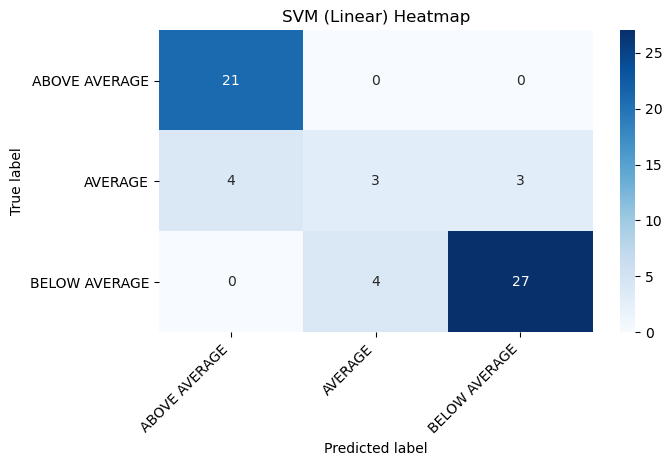

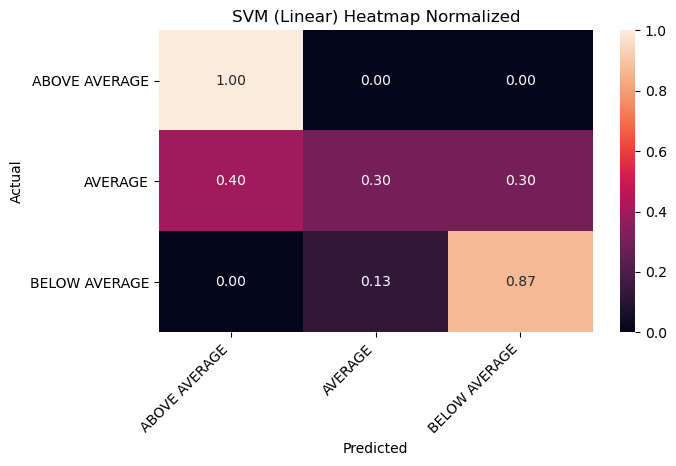

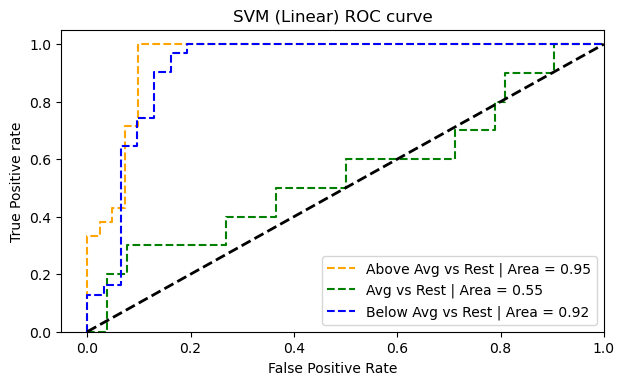

In [ ]:
sv_model = SVC(kernel="linear",probability=True)
sv_model.fit(x_train, y_train)
sv_predictions = sv_model.predict(x_test)

sc_score = sv_model.score(x_test,y_test)
recall = recall_score(y_test, sv_predictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(sv_model, X, y, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(sv_model, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, sv_predictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SVM (Linear) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM (Linear) Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(sv_model)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('SVM (Linear) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.8387096774193549
Recall:  0.7292882744495648
KFold Accuracy: 0.853 (0.069)
KFold Precision: 0.739 (0.159)
KFold Recall: 0.727 (0.115)
KFold F1 Score: 0.723 (0.130)
KFold ROC/AUC: 0.914 (0.058)


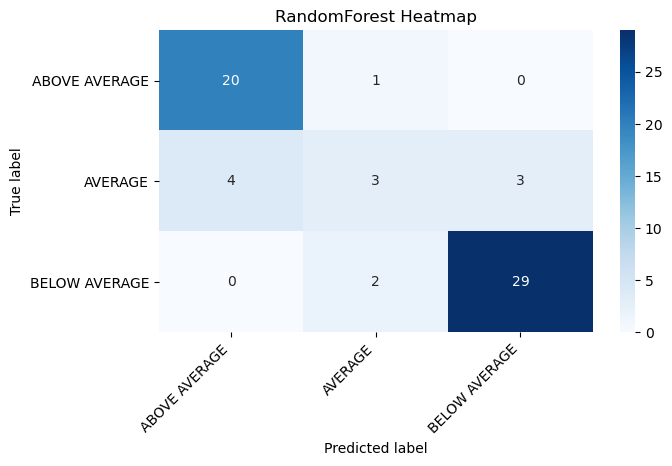

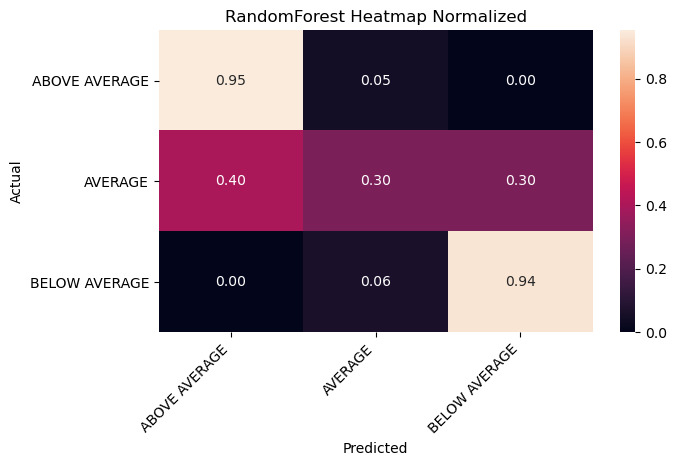

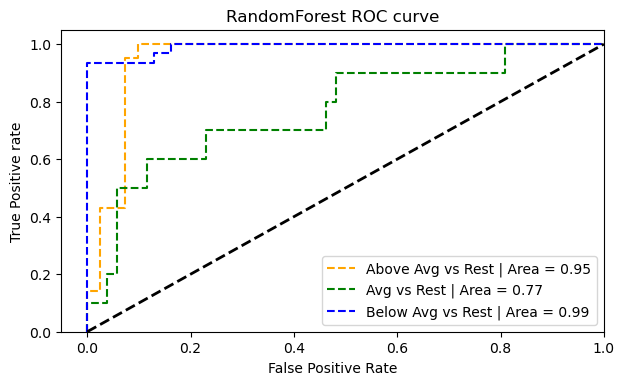

In [ ]:
linearModel = RandomForestClassifier()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(linearModel, X, y, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('RandomForest Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RandomForest Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('RandomForest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.7580645161290323
Recall:  0.6201228878648233
KFold Accuracy: 0.800 (0.033)
KFold Precision: 0.552 (0.075)
KFold Recall: 0.631 (0.038)
KFold F1 Score: 0.585 (0.051)
KFold ROC/AUC: 0.874 (0.046)


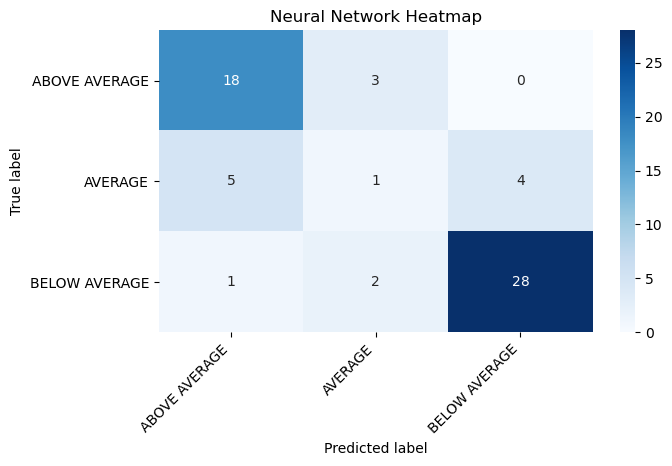

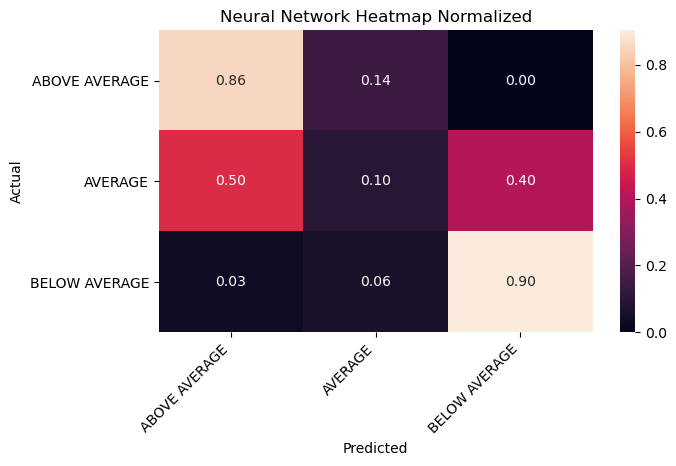

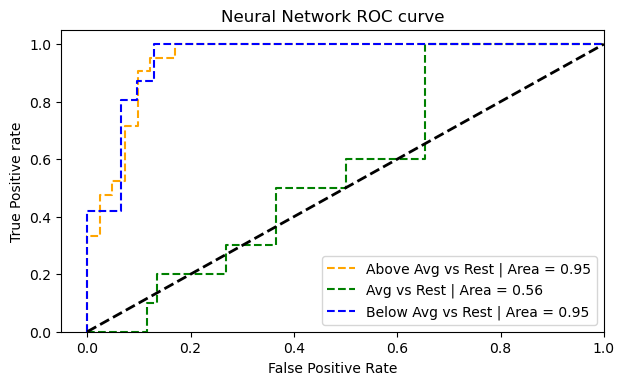

In [ ]:
#Neural Network
linearModel = MLPClassifier(max_iter=500)
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(linearModel, X, y_numeric, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train_numeric, y_train_numeric, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Neural Network Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Neural Network Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Neural Network ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.5483870967741935
Recall:  0.647721454173067
KFold Accuracy: 0.559 (0.101)
KFold Precision: 0.737 (0.036)
KFold Recall: 0.634 (0.080)
KFold F1 Score: 0.546 (0.090)
KFold ROC/AUC: 0.922 (0.058)


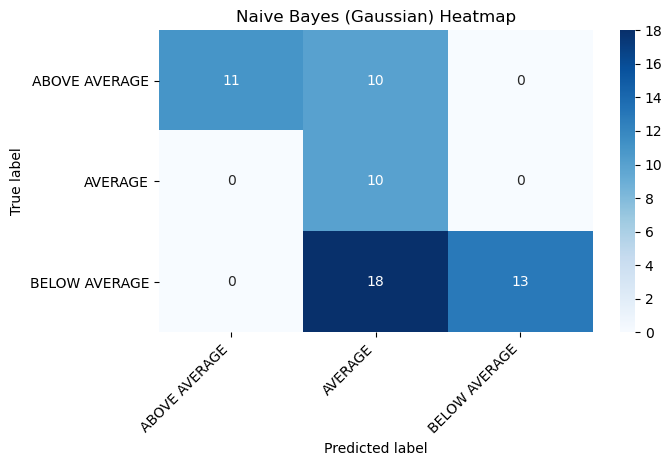

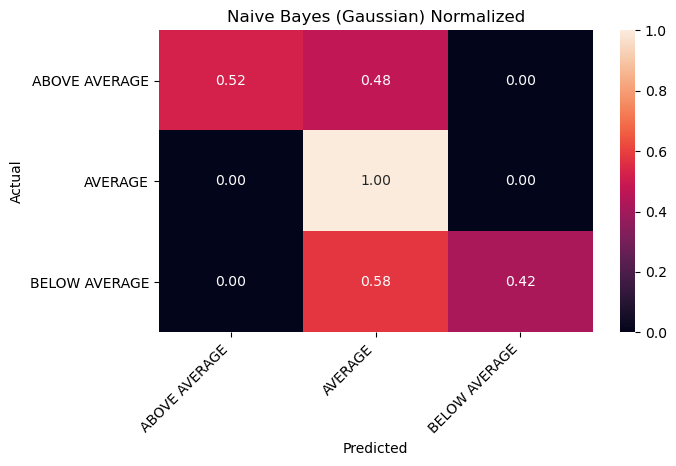

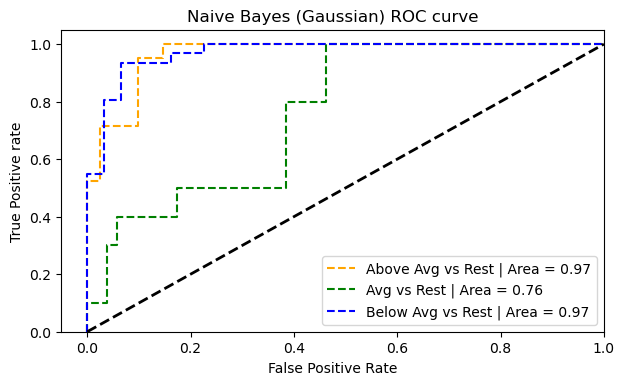

In [ ]:
linearModel = GaussianNB()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(linearModel, X, y, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes (Gaussian) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes (Gaussian) Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Naive Bayes (Gaussian) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.7419354838709677
Recall:  0.5765488991295443
KFold Accuracy: 0.808 (0.039)
KFold Precision: 0.544 (0.030)
KFold Recall: 0.625 (0.030)
KFold F1 Score: 0.579 (0.028)
KFold ROC/AUC: 0.890 (0.064)


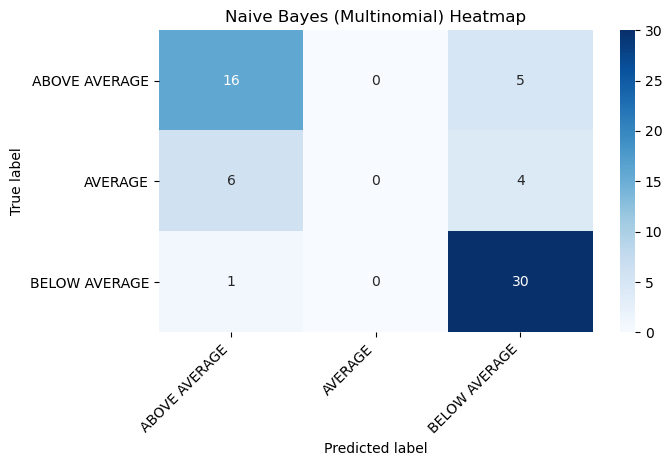

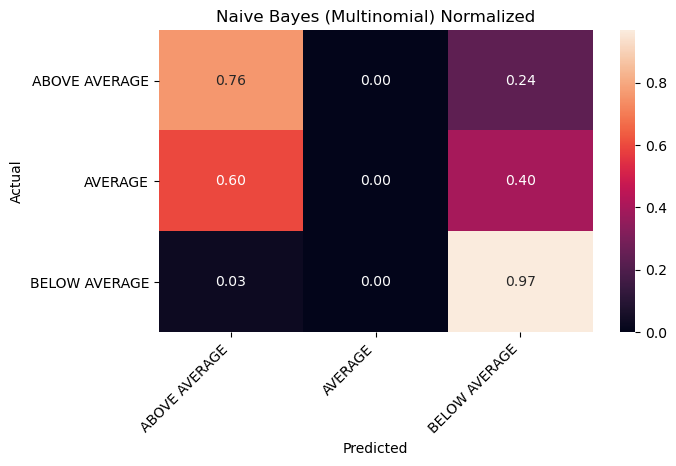

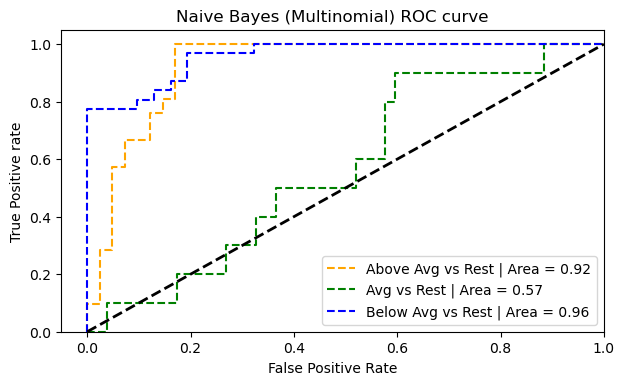

In [ ]:
linearModel = MultinomialNB()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(linearModel, X, y_numeric, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes (Multinomial) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes (Multinomial) Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Naive Bayes (Multinomial) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.7741935483870968
Recall:  0.6134152585765489
KFold Accuracy: 0.825 (0.026)
KFold Precision: 0.552 (0.017)
KFold Recall: 0.642 (0.023)
KFold F1 Score: 0.591 (0.020)
KFold ROC/AUC: 0.890 (0.066)


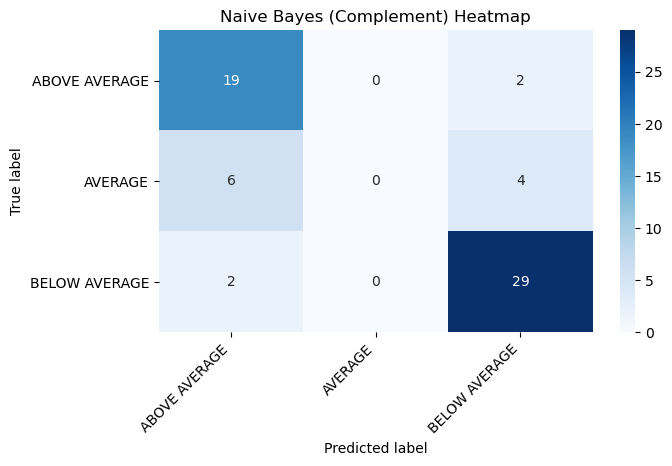

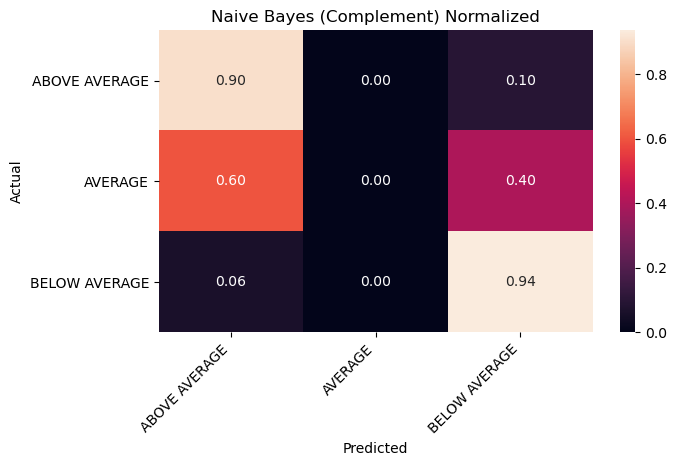

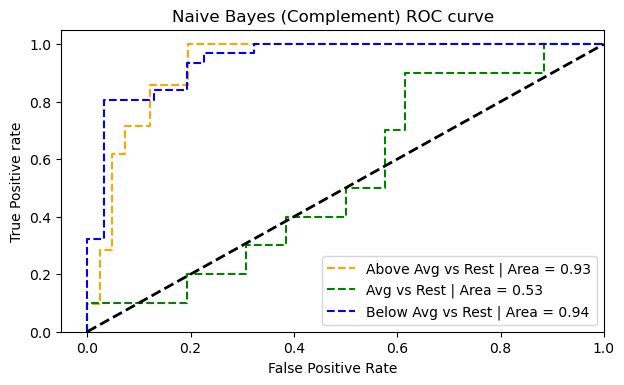

In [ ]:
linearModel = ComplementNB()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(linearModel, X, y, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes (Complement) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes (Complement) Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Naive Bayes (Complement) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.7580645161290323
Recall:  0.6150025601638505
KFold Accuracy: 0.812 (0.054)
KFold Precision: 0.670 (0.166)
KFold Recall: 0.658 (0.066)
KFold F1 Score: 0.639 (0.088)
KFold ROC/AUC: 0.836 (0.085)


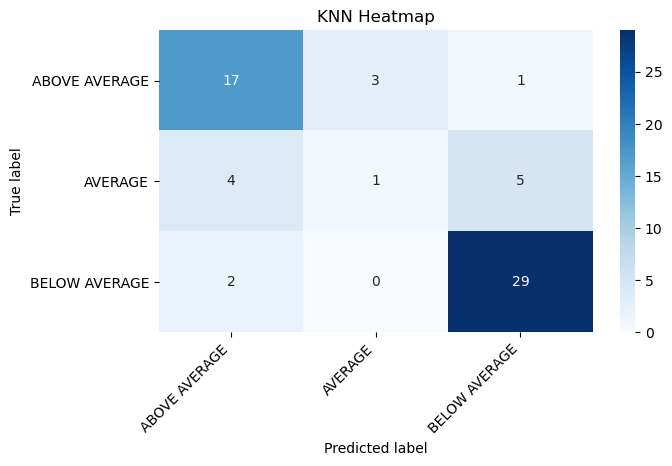

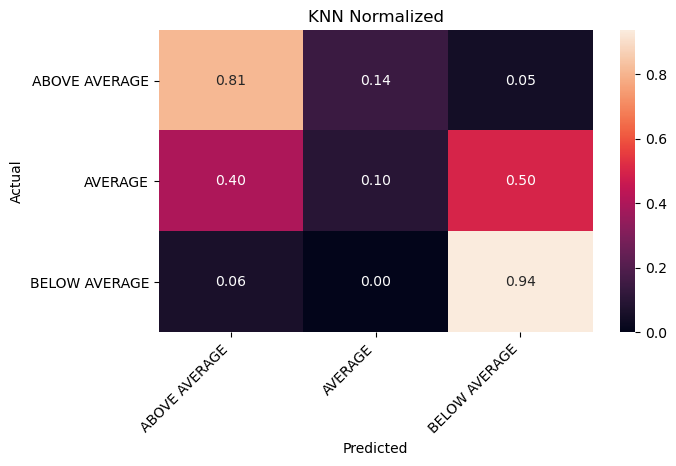

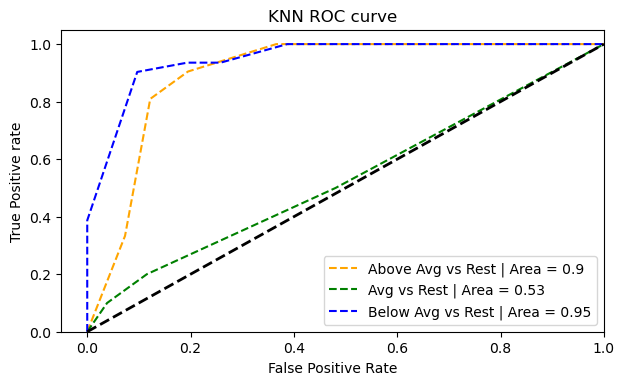

In [ ]:
linearModel = KNeighborsClassifier()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
recall = recall_score(y_test, linearPredictions, average='macro')
print('Model Score: ', Model_score)
print('Recall: ', recall)

# evaluate model
#scores = cross_validate(linearModel, X, y, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
scores = cross_validate(linearModel, x_train, y_train, cv=cv, n_jobs=-1,scoring=scoring, error_score="raise",)
# report performance
#print(scores)
print('KFold Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('KFold Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('KFold Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('KFold F1 Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))
print('KFold ROC/AUC: %.3f (%.3f)' % (mean(scores['test_roc_auc']), std(scores['test_roc_auc'])))

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('KNN Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(7,4),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

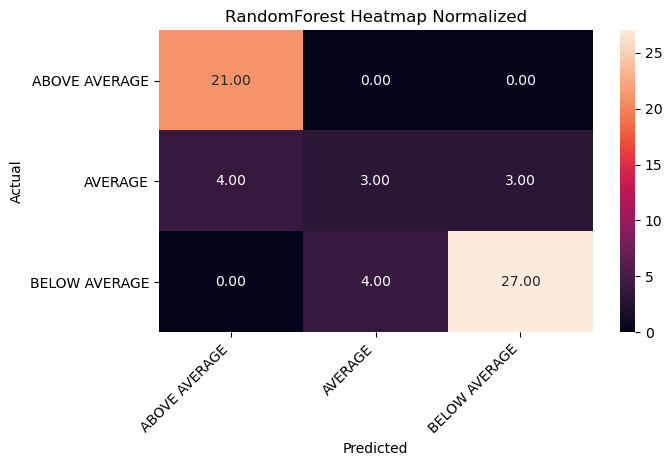

In [ ]:
new_y = [
    'AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'AVERAGE',
    'BELOW AVERAGE',
    'ABOVE AVERAGE',
    'ABOVE AVERAGE',
    'AVERAGE',
    'BELOW AVERAGE',
    'ABOVE AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
]

new_predictions = [
    'AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'BELOW AVERAGE',
    'AVERAGE',
    'ABOVE AVERAGE',
]
conmat = confusion_matrix(y_test, sv_predictions)
val = np.mat(conmat)
df_cmn = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(7,4),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RandomForest Heatmap Normalized')
plt.show(block=False)